# Критерии Стьюдента

In [1]:
import numpy as np
import pandas as pd

import scipy
from statsmodels.stats.weightstats import *

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib




## Treatment effects of methylphenidate

В рамках исследования эффективности препарата метилфенидат 24 пациента с синдромом дефицита внимания и гиперактивности в течение недели принимали либо метилфенидат, либо плацебо. В конце недели каждый пациент проходили тест на способность к подавлению импульсивных поведенческих реакций. На втором этапе плацебо и препарат менялись, и после недельного курса каждый испытуемые проходили второй тест.

Требуется оценить эффект применения препарата.

Pearson D.A, Santos C.W., Casat C.D., et al. (2004). Treatment effects of methylphenidate on cognitive functioning in children with mental retardation and ADHD. Journal of the American Academy of Child and Adolescent Psychiatry, 43(6), 677–685.

In [3]:
data = pd.read_csv('ADHD.txt', sep = ' ', header = 0)
data.columns = ['Placebo', 'Methylphenidate']

In [4]:
data.describe()

,Placebo,Methylphenidate
count,24.000000,24.000000
mean,39.750000,44.708333
std,11.314669,12.319935
min,26.000000,29.000000
25%,33.000000,35.000000
50%,36.000000,42.500000
75%,44.500000,52.500000
max,71.000000,77.000000


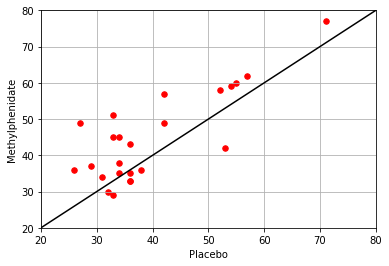

In [5]:
data.plot.scatter('Placebo', 'Methylphenidate', c = 'r', s = 30)
pylab.grid()
pylab.plot(range(100), c = 'black')
pylab.xlim((20, 80))
pylab.ylim((20, 80))
pylab.show()

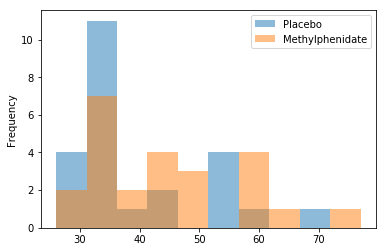

In [6]:
data.plot(kind='hist', alpha=0.5)
pylab.show()

## Одновыборочный критерий Стьюдента

Исходя из того, что способность к подавлению испульсивных поведенческих реакций измеряется по шкале [0, 100], можно предположить, что при хорошей калибровке теста средняя способоность к подавлению реакций в популяции составляет 50. Тогда для того, чтобы проверить гипотезу о том, что пациенты в выборке действительно в среднем хуже справляются с подавлением импульсивных реакций (нуждаются в лечении), давайте проверим, что их способность к подавлению реакций отличается от средней (не равна 50). 

$H_0\colon$ среднее значение способности к подавлению испульсивных поведенческих реакций равно 50.

$H_1\colon$ не равно.

In [7]:
stats.ttest_1samp(data.Placebo, 50.0)

Ttest_1sampResult(statistic=-4.438003341905128, pvalue=0.00018894293251080175)

95% доверительный интервал: $ \overline{x} \pm 1,96 \cdot se $ 

In [8]:
(data.Placebo.mean() -  1.96 * data.Placebo.std(ddof=1) / np.sqrt(len(data.Placebo)),
data.Placebo.mean() +  1.96 * data.Placebo.std(ddof=1) / np.sqrt(len(data.Placebo)))

(35.223189528655055, 44.276810471344945)

In [9]:
print(f"95%% confidence interval: {zconfint(data.Placebo, alpha=0.05)}")

95%% confidence interval: (35.223272709859756, 44.276727290140244)


99% доверительный интервал: $ \overline{x} \pm 2,58 \cdot se $ 

In [10]:
(data.Placebo.mean() -  2.58 * data.Placebo.std(ddof=1) / np.sqrt(len(data.Placebo)),
data.Placebo.mean() +  2.58 * data.Placebo.std(ddof=1) / np.sqrt(len(data.Placebo)))

(33.791239277515324, 45.708760722484676)

In [11]:
print(f"99%% confidence interval: {zconfint(data.Placebo, alpha=0.01)}")

99%% confidence interval: (33.800871906274324, 45.699128093725676)


## Двухвыборочный критерий Стьюдента (независимые выборки)

Для того, чтобы использовать двухвыборочный критерий Стьюдента, убедимся, что распределения в выборках существенно не отличаются от нормальных.

Так как $n_1 = n_2$, критерий Стьюдента можно использовать.

`scipy.stats.probplot(x, sparams=(), dist='norm', fit=True, plot=None, rvalue=False)` — calculate quantiles for a probability plot, and optionally show the plot.

`pylab.subplot(*args)` — add a subplot to the current figure. `args*` is (nrows, ncols, index)

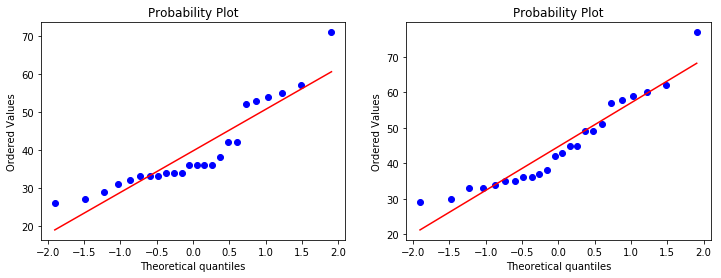

In [25]:
pylab.figure(figsize=(12,4))
pylab.subplot(1,2,1)
stats.probplot(data.Placebo, dist="norm", plot=pylab)
pylab.subplot(1,2,2)
stats.probplot(data.Methylphenidate, dist="norm", plot=pylab)
pylab.show()

Критерий Шапиро-Уилка:

 $H_0\colon$ способности к подавлению импульсивных реакций распредлены нормально
 
 $H_1\colon$ не нормально.

In [28]:
w_statistic, p_val = stats.shapiro(data.Placebo)
print(f"Shapiro-Wilk normality test, W-statistic: {w_statistic}, p-value: {p_val}")

Shapiro-Wilk normality test, W-statistic: 0.8574873208999634, p-value: 0.00302018690854311


In [29]:
w_statistic, p_val = stats.shapiro(data.Methylphenidate)
print(f"Shapiro-Wilk normality test, W-statistic: {w_statistic}, p-value: {p_val}")

Shapiro-Wilk normality test, W-statistic: 0.9164453148841858, p-value: 0.04876822605729103


Критерий Стьюдента работает, если распределение не нормальное, но существенно от него не отличчается.

С помощью критерия Стьюдента проверим гипотезу о развенстве средних двух выборок.

Критерий Стьюдента:

$H_0\colon$ средние значения способности к подавлению испульсивных поведенческих реакций одинаковы для пациентов, принимавших препарат, и для пациентов, принимавших плацебо.

$H_0\colon$ не одинаковы.

`scipy.stats.ttest_ind` — calculate the T-test for the means of two independent samples of scores. `equal_var` — `True` if 2 sample test have equal population variances.

In [34]:
scipy.stats.ttest_ind(data.Placebo, data.Methylphenidate, equal_var=False)

Ttest_indResult(statistic=-1.4521635018159091, pvalue=0.1532919977404709)

In [51]:
scipy.stats.ttest_ind(data.Placebo, data.Methylphenidate, equal_var=True)

Ttest_indResult(statistic=-1.452163501815909, pvalue=0.1532433046938409)

Интервальная оценка разности средних по двум выборкам:

In [52]:
cm = CompareMeans(DescrStatsW(data.Methylphenidate), DescrStatsW(data.Placebo))
print(f"95%% confidence interval: [{cm.tconfint_diff(alpha=0.05, usevar='unequal')}]")

95%% confidence interval: [(-1.9159267979412196, 11.832593464607891)]


## Двухвыборочный критерий Стьюдента (зависмые выборки)

Для того, чтобы использовать критерй Стьюдента для связанных выборок, давайте проверим, что распределение попарных разностей существенно не отличается от нормального.

Попарные разности

In [56]:
data.Methylphenidate - data.Placebo

0      5
1     22
2     -2
3      3
4      4
5     -2
6      6
7     18
8     11
9    -11
10     7
11    15
12    10
13     6
14    -1
15     5
16    -3
17     7
18    -3
19     5
20     1
21     8
22    12
23    -4
dtype: int64

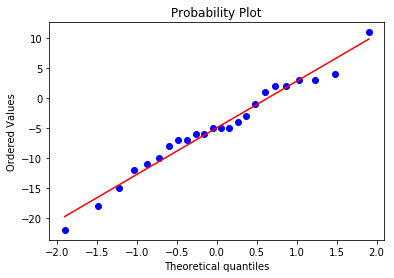

In [57]:
stats.probplot(data.Placebo - data.Methylphenidate, dist = "norm", plot = pylab)
pylab.show()

Критерий Шапиро-Уилка:

$H_0\colon$ попарные разности распределены нормально.

$H_1\colon$ не нормально.

In [58]:
w_statistic, p_val = stats.shapiro(data.Methylphenidate - data.Placebo)
print(f"Shapiro-Wilk normality test, W-statistic: {w_statistic}, p-value: {p_val}")

Shapiro-Wilk normality test, W-statistic: 0.9798055291175842, p-value: 0.8922544717788696


Критерий Стьюдента:

$H_0\colon$ средние значения способности к подавлению испульсивных поведенческих реакций одинаковы для пациентов, принимавших препарат, и для пациентов, принимавших плацебо.

$H_1\colon$ не одинаковы.

In [59]:
stats.ttest_rel(data.Methylphenidate, data.Placebo)

Ttest_relResult(statistic=3.2223624451230406, pvalue=0.003771488176381471)

`DescrStatsW.tconfint_mean` — two-sided confidence interval for weighted mean of data

In [62]:
print(f"95%% confidence interval: {DescrStatsW(data.Methylphenidate - data.Placebo).tconfint_mean()}")

95%% confidence interval: (1.7752357893192365, 8.14143087734743)
